In [1]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing and loading 
df = pd.read_csv(r"c:\Users\Pratik patil\Downloads\cardata.csv")


In [3]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [28]:
df.shape

(285, 9)

In [4]:
# visualize data
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
# Remove duplicate rows 
df = df.drop_duplicates()



In [6]:
# Check for missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
# Step 3: Create Car_Age for current year
from datetime import datetime
current_year=datetime.now().year
df['Car_Age'] = 2025 - df['Year']
df = df.drop(columns=['Year'])

C:\Users\Pratik patil\AppData\Local\Temp\ipykernel_11632\3180506833.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Car_Age'] = 2025 - df['Year']


In [8]:
# Remove outliers
# by data: prices < $20, mileage < 100,000 km
df = df[df['Selling_Price'] < 20]
df = df[df['Kms_Driven'] < 100000]
print(f" Removed outliers. Dataset has {len(df)} rows.")

 Removed outliers. Dataset has 285 rows.


In [9]:
# encoding
categorical = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
df = pd.get_dummies(df, columns=categorical, drop_first=True)

In [10]:
# Remove Car_Name 
df = df.drop(columns=['Car_Name'])
print("Removed Car_Name from the dataset.")

Removed Car_Name from the dataset.


In [11]:
# Avoid data leakage by excluding Present_Price
X = df.drop(columns=['Selling_Price', 'Present_Price'])
y = df['Selling_Price']



#  Plotting

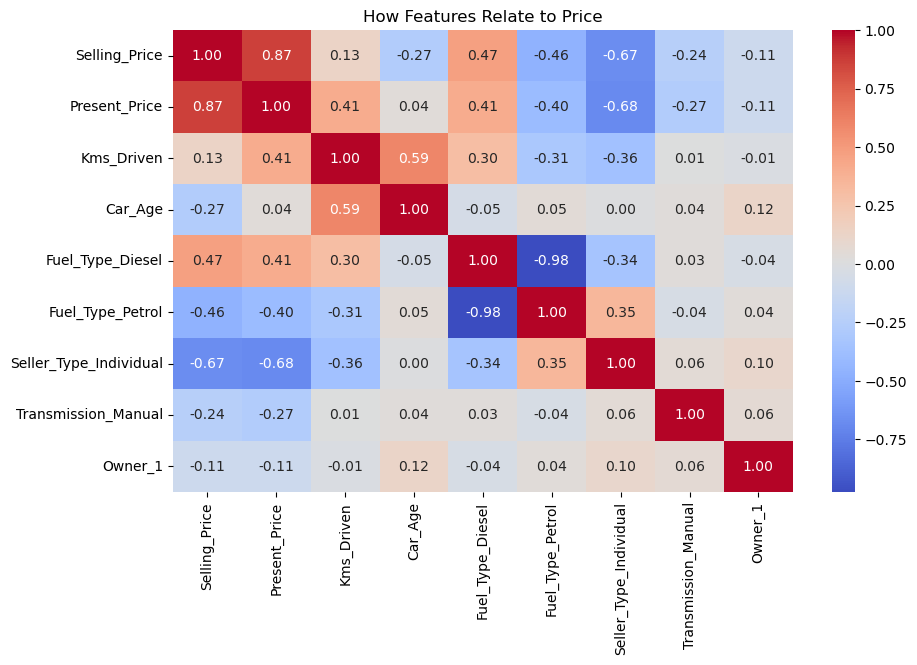

In [12]:
#  Heatmap 
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('How Features Relate to Price')
plt.show()

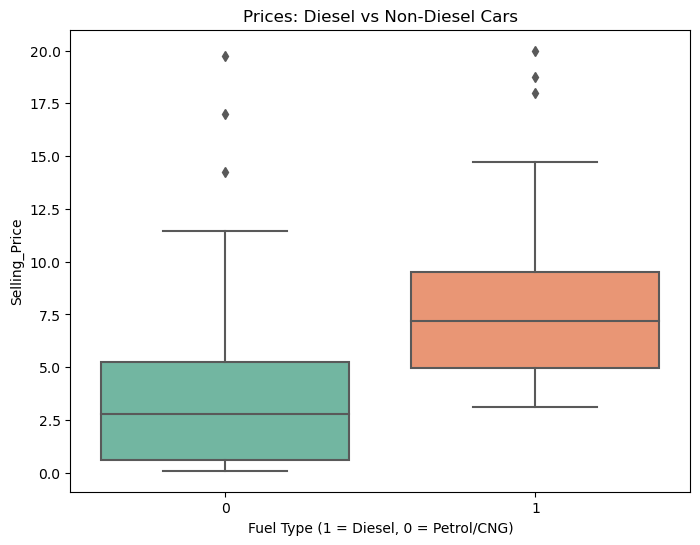

In [13]:
#  Boxplot 
plt.figure(figsize=(8, 6))
sns.boxplot(x='Fuel_Type_Diesel', y='Selling_Price', data=df, palette='Set2')
plt.title('Prices: Diesel vs Non-Diesel Cars')
plt.xlabel('Fuel Type (1 = Diesel, 0 = Petrol/CNG)')
plt.show()

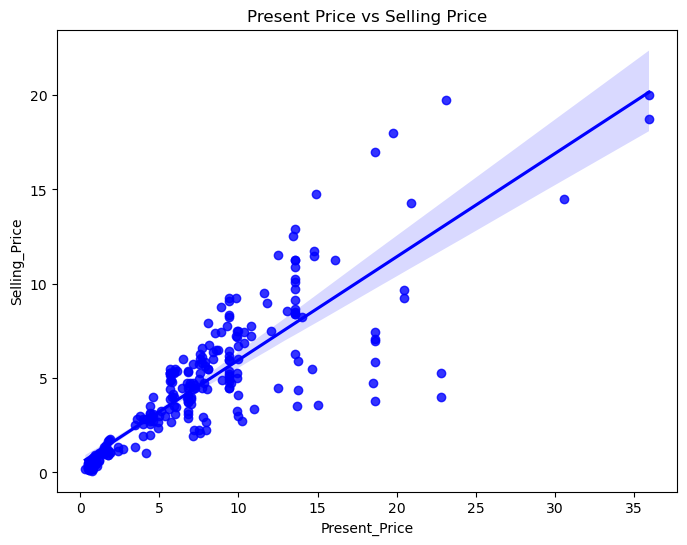

In [14]:
# regression plot for Present_Price vs Selling_Price
plt.figure(figsize=(8, 6))
sns.regplot(x='Present_Price', y='Selling_Price', data=df, color='blue')
plt.title('Present Price vs Selling Price')
plt.show()

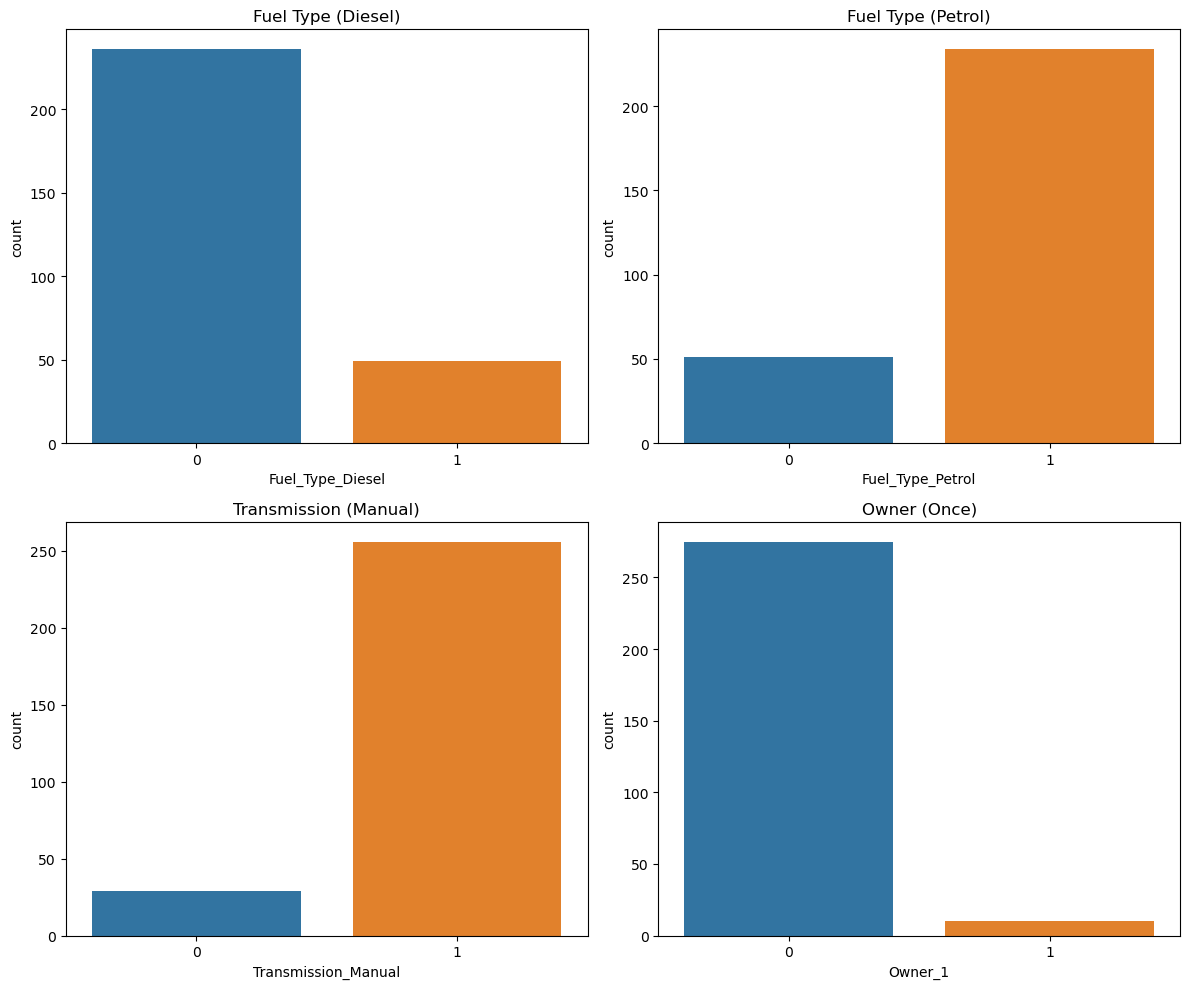

In [15]:
# Bar plots for categories
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.countplot(x='Fuel_Type_Diesel', data=df, ax=axes[0, 0])
sns.countplot(x='Fuel_Type_Petrol', data=df, ax=axes[0, 1])
sns.countplot(x='Transmission_Manual', data=df, ax=axes[1, 0])
sns.countplot(x='Owner_1', data=df, ax=axes[1, 1])
axes[0, 0].set_title('Fuel Type (Diesel)')
axes[0, 1].set_title('Fuel Type (Petrol)')
axes[1, 0].set_title('Transmission (Manual)')
axes[1, 1].set_title('Owner (Once)')
plt.tight_layout()
plt.show()

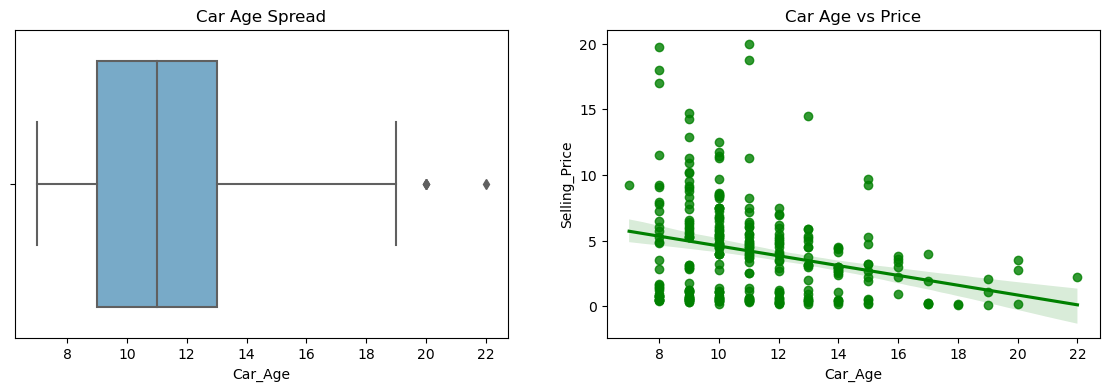

In [16]:
# regression & box plot for Car_Age vs Selling_Price
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
sns.regplot(x='Car_Age', y='Selling_Price', data=df, ax=axes[1], color='green')
sns.boxplot(x='Car_Age', data=df, ax=axes[0], palette='Blues')
axes[1].set_title('Car Age vs Price')
axes[0].set_title('Car Age Spread')
plt.show()

In [17]:
# dependant variable
X = df.drop(columns=['Selling_Price', 'Present_Price'])
y = df['Selling_Price']


In [18]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [19]:
# Use Random Forest for feature matters
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
feature_names = X_train.columns
# getting feature by their importance
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

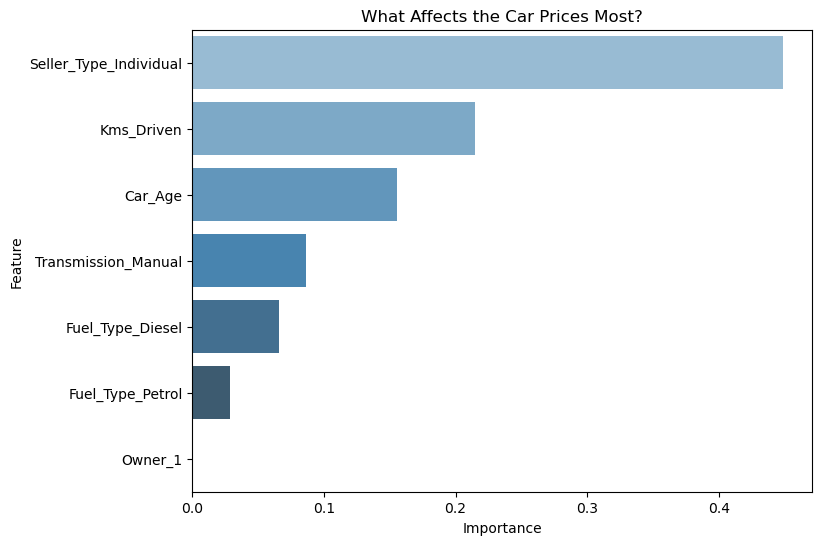

In [20]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='Blues_d')
plt.title('What Affects the Car Prices Most?')
plt.show()

In [21]:
#  importing models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error,mean_squared_error, mean_absolute_error, r2_score
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

In [22]:
# Hyperparameters tuning for rf and xgboost
tuning_params = {
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'max_depth': [3, 5]
    }
}

In [23]:
# List to save model results
results = []

In [24]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# Initialize a list to store results of each model
results = []

# Loop through each model
for name, model in models.items():
    print(f"\nTraining {name}..")

    # Tune model if tuning parameters are defined (for Random Forest and XGBoost)
    if name in tuning_params:
        grid_search = GridSearchCV(model, tuning_params[name], cv=5, scoring='r2', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        model = grid_search.best_estimator_
        print(f"Best parameters for {name}: {grid_search.best_params_}")
    else:
        # Train directly without tuning
        model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Cross-validation R2 on the full dataset
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    cv_r2 = cv_scores.mean()

    # Save results for each model
    results.append({
        'Model': name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'CV R2': cv_r2
    })

    
# Create DataFrame for all model results
results_df = pd.DataFrame(results)

# Display comparison of all models
print("\nModel Comparison:")
print("*" * 10)
print(results_df.round(2))



Training Linear Regression..

Training Decision Tree..

Training Random Forest..
Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 100}

Training XGBoost..
Best parameters for XGBoost: {'max_depth': 5, 'n_estimators': 100}

Model Comparison:
**********
               Model   MSE  RMSE   MAE    R2  CV R2
0  Linear Regression  2.62  1.62  1.21  0.67 -48.42
1      Decision Tree  4.81  2.19  1.32  0.40 -10.21
2      Random Forest  2.62  1.62  1.04  0.67  -6.27
3            XGBoost  5.23  2.29  1.45  0.35 -28.15


In [25]:
# making the best rf modell
print("\nVisualizing error for rf")
best_rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
best_rf.fit(X_train, y_train)
y_pred_rf = best_rf.predict(X_test)


Visualizing error for rf


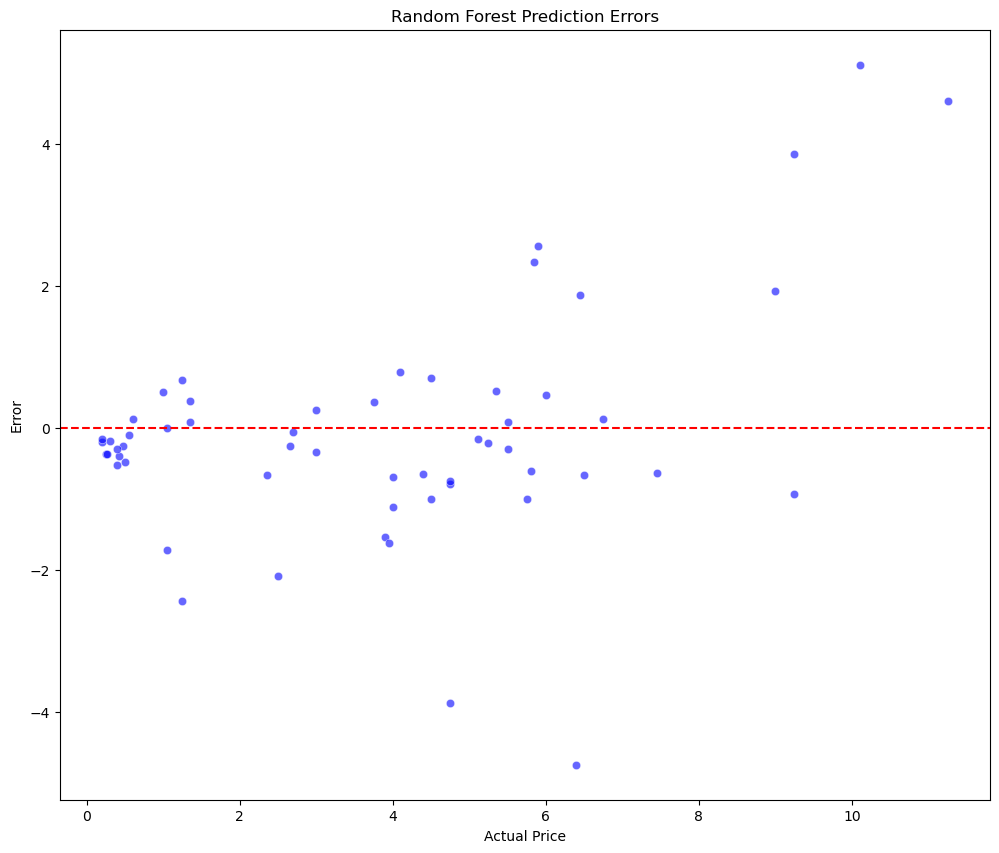

In [26]:
# plotting residual plot
plt.figure(figsize=(12, 10))
residuals = y_test - y_pred_rf
sns.scatterplot(x=y_test, y=residuals, color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Random Forest Prediction Errors')
plt.xlabel('Actual Price')
plt.ylabel('Error')
plt.show()


# Conclusion

The machine learning model—particularly the Random Forest Regressor & Linear Regression —can be effectively used to estimate car selling prices with decent accuracy. This kind of model can be helpful for:

Online car resale platforms (like OLX, CarDekho, Cars24)

Dealerships for dynamic pricing

Consumers wanting to estimate the fair resale value